# Logistic regression

## Definition and intuition

The <a href=Linear_models.ipynb>linear regression</a> does not work well with classification cases, a solution for classification tasks is using logistic regression (a generalized linear model). using a link function (the logistic function) it allows the target to exist only between 0 and 1 making it possible to achieve binary classification and also giving a probability of a sample belonging to one class or another.    

## Logistic Regression and interpretability 

As mentioned above, the logistic regression model outputs a probability of belonging to a certain  class (the class that has the label 1). Let's call this probability $Y$:  
We have :
$$ log(Y) = \beta_0 + \beta_1 X_1 + ... + \beta_n X_n  $$
In Linear models, in order to achieve explainability we plotted the coefficients $(\beta_0, \beta_1, ..., \beta_n)$ but here we will plot $(exp(\beta_0), exp(\beta_1), ..., exp(\beta_n))$ as they represent :

* **Numerical feature**: For an increase of one unit in the corresponding feature, the odds are multiplied by $exp(\beta)$ 
* **Binary categorical feature**: For a change of the feature from the reference level (0) to the level (1) the odds are multiplied exp(βj)
* **Categorical feature with many levels**: to deal with multiple categories we can one-hot code them, returning to the case of binary features.
> Odds are a way to describe the chances of an event occurring, it is the probability of success divided by the probability of failure

## Importations

In [1]:
import sklearn as sk
import pandas as pd

# Importing lending club dataset
from mlinutils.datasets import Loans

# Libraries specific to Logistic regression models 
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import MinMaxScaler

import mlinutils.linear_model_plots as lmp
import mlinutils.sanity as san

In [2]:
#  make plot outputs appear and be stored within the notebook
%matplotlib inline

## The datasets we're using 

### Data description
The full description of the Datasets that are used in this entire collection of notebooks is available separately 
* Lending club: information on users and wether or not they default on their payments from a peer to peer lending online service <a href="lending_club_dataset.ipynb">see lending club dataset exploration</a> 

### Data importation 

In [3]:
loans = Loans()
ln_X_train, ln_X_test, ln_y_train, ln_y_test = loans.load()
loan = loans.data

### Data preview
Take a peak into the data we'll be using !

In [4]:
loans.preview()

This dataset contains 98339 instances with 19 attributes


,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,open_acc_6m,inq_fi,mths_since_crl_was_opened,bad_loan_status
12994,17700.0,17.57,445.34,4.0,1.0,MORTGAGE,46000.0,Not Verified,debt_consolidation,28.39,0.0,0.0,19.0,19898.0,75.9,1.0,1.0,82.991437,1
84331,14500.0,8.90,460.43,7.0,10.0,MORTGAGE,71000.0,Verified,debt_consolidation,1.12,0.0,0.0,4.0,2113.0,70.4,1.0,1.0,192.923879,0
5039,19000.0,15.80,460.03,5.0,10.0,MORTGAGE,49000.0,Verified,debt_consolidation,22.65,2.0,1.0,15.0,8374.0,43.8,1.0,1.0,141.998809,1
40826,21000.0,9.99,677.52,6.0,10.0,MORTGAGE,175000.0,Not Verified,credit_card,9.14,1.0,0.0,16.0,47073.0,56.1,1.0,1.0,145.021458,1
26510,28000.0,7.90,876.13,7.0,10.0,OWN,125000.0,Source Verified,debt_consolidation,12.33,1.0,0.0,11.0,12860.0,31.9,1.0,1.0,276.999528,0


## Application

### Plan
For logistic regression models we will only see its interpretability for the task: classification with lending club dataset (for regression with bike sharing <a href=Linear_Models.ipynb>see the linear models notebook</a>). We can interpret the our results (globally and locally). We will add LASSO and Ridge penalization and compare their effect on interpretability.  
* <a href=#lr>Classification with lending club dataset</a>  
    * <a href=#lrnone> Logistic regression without penalization </a>
        * <a href=#lrnonem> Model creation and sanity checks </a>
        * <a href=#lrnoneg> Global explanation </a>
        * <a href=#lrnonel> Local explanation </a>
    * <a href=#lrc>Conclusions </a>

### Classification with lending club dataset <a name=lr>

#### Logistic regression without penalization <a name=lrnone>

##### Model creation and sanity checks <a name=lrnonem>

In [5]:
# Model creation
scaler = MinMaxScaler()
scaler.fit(ln_X_train)

scaled_ln_X_train = scaler.transform(ln_X_train)
scaled_ln_X_test = scaler.transform(ln_X_test)

lr = LogisticRegression(C=0.05).fit(scaled_ln_X_train, ln_y_train)

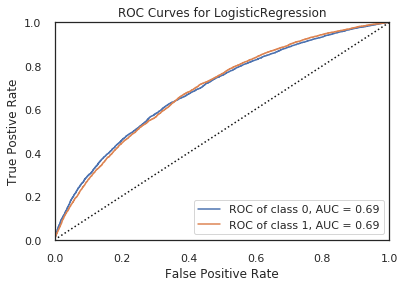

In [6]:
# Sanity checks
san.classification_sanity_check(lr, 
                                scaled_ln_X_train, scaled_ln_X_test,
                                ln_y_train, ln_y_test)

#### Global explanation <a name=lrnoneg>
The following figure explains what happens in the model globally, the global trends and the importance of each and every feature.
Logistic regression coefficients are reported as log odds. 
    
It's a representation of the the exponential of the coefficients 
* If $\beta \geq 0$: the value <span style="color:#3572C6">augments</span> the probability of belonging to the "positive" class and it is represented as "the target outcome (e.g., a correct response) is $exp(\beta)$ times <b>more likely</b> than the non-target outcome (e.g., an incorrect response)."
* If $\beta < 0$ the value <span style="color:##C44E52">diminishes</span> the probability of belonging to the default class and it is represented as "the target outcome (e.g., a correct response) is $exp(-\beta)$ times <b>less likely</b> than the non-target outcome (e.g., an incorrect response)."
    
A more detailed guidance on how to interpret logistic regression coefficients can be find at [Interpreting logistic regression models (pdf)](http://www-hsc.usc.edu/~eckel/biostat2/notes/notes14.pdf)

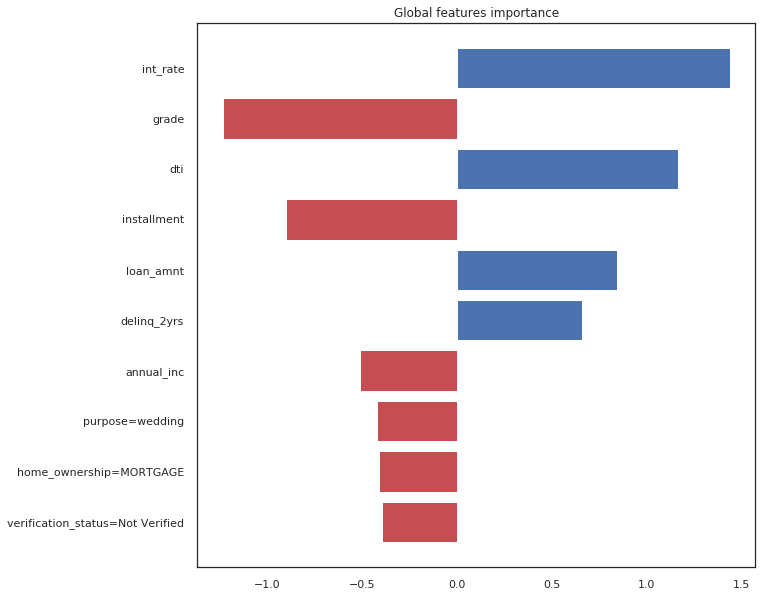

In [7]:
lmp.global_explanation_plot(ln_X_train.columns, lr, selected_ft=10)

#### Local explanation <a name=lrnonel>
After looking at global explanations, we need to understand why for a particular sample the prediction was made.
For a single sample we explain the numerical contribution of each feature to the probability. (in a mutiplication sense
we evaluate and display the contribution of each feature to the predicted total.

In [8]:
loan_sample = scaled_ln_X_test[42]

## recovers the original format just for reading convenience
loans.data.iloc[[ln_X_test.iloc[42].name],:]

,loan_amnt,int_rate,installment,grade,emp_length,home_ownership,annual_inc,verification_status,purpose,dti,delinq_2yrs,inq_last_6mths,open_acc,revol_bal,revol_util,open_acc_6m,inq_fi,mths_since_crl_was_opened,bad_loan_status
80149,8000.0,14.64,275.92,5.0,6.0,MORTGAGE,96000.0,Verified,home_improvement,16.89,0.0,4.0,11.0,10899.0,31.6,1.0,1.0,244.966016,0


Probability of "default" is: 0.19


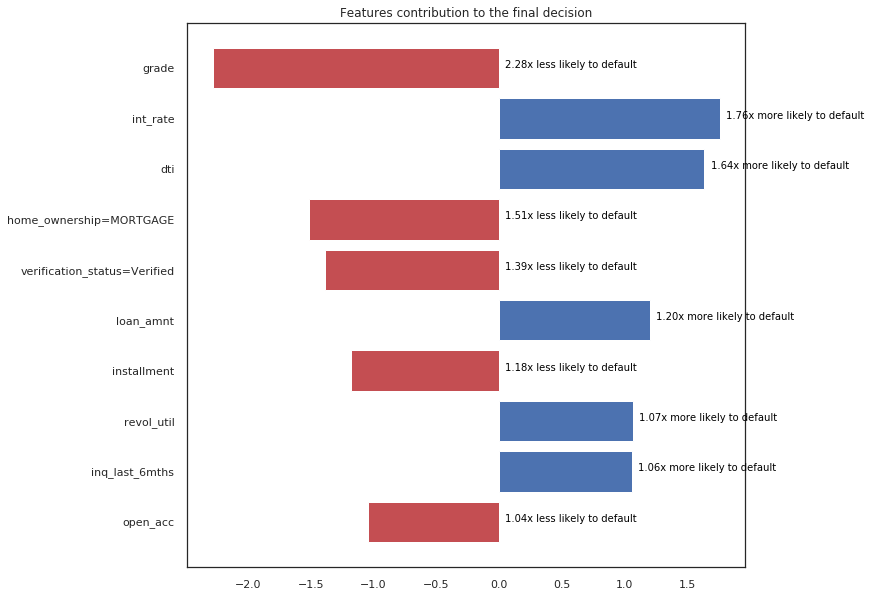

In [9]:
lmp.local_logistic_plot(loan_sample,
                        feature_names=ln_X_test.columns,
                        logistic_model=lr,
                        classes_label=["not default", "default"]);

#### Conclusions <a name=lrc>

Like linear models, logistic regression is pretty intuitive and easy to interpret, in industries where interpretability is required by law, it is being used as a standard for explainability.